In [1]:
# knn, svc, dt, logisticregression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
import mglearn

In [13]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### KNN : KNeighborsClassifier
* 가장 간단
* 주변의 가장 가까운 K개를 뽑아서 다수결로 분류

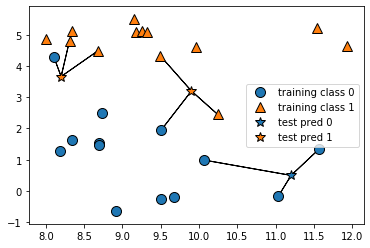

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [31]:
x, y = mglearn.datasets.make_forge()

C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [32]:
x

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [33]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=111)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [36]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
preds = clf.predict(x_test)
preds

array([0, 1, 0, 1, 1, 0])

In [38]:
clf.score(x_test, y_test)

0.6666666666666666

In [46]:
import matplotlib as mpl

import matplotlib.font_manager as fm



mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'



font_name = fm.FontProperties(fname=path, size=50).get_name()

plt.rc('font', family=font_name)

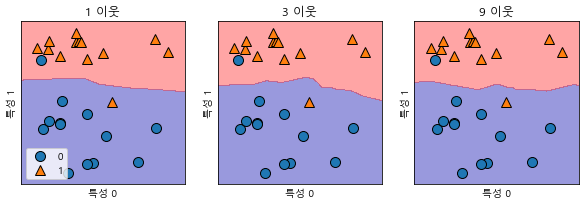

In [47]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)
plt.show()

In [45]:
# n_neighbors의 갯수가 작을 수록 복잡한 경계면이 생성 => 복잡도 높음 => 과적합
#                       클수록 완만한 경계면이 생성 => 복잡도 낮음 => 과소적합..

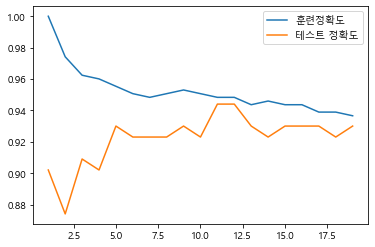

In [57]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

training_accuracy = []
test_accuracy = []

n_neighbors = range(1,20)

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(n_neighbors, training_accuracy, label = '훈련정확도')
plt.plot(n_neighbors, test_accuracy, label='테스트 정확도')
plt.legend()
    

In [ ]:
# 과대적합 : 모델이 train data에만 과도한 적합화(정확도 상상).. 모델이 복잡할 때..
# 과소적합 : 모델이 train이 덜 되어서 train data, test data 모두에 정확도가 떨어질 떄
# 일반화 : 모델이 test data에 잘 적합되어서 test data  정확도가 높은 경우..

# 목표 : test data에서 정확도를 높이는 것..

# n_neighbors < 10 : 과대적합
# n_neighbors > 10 : 과소적합
# n_neighbors = 10 ~ 12 : 일반화

In [62]:
x, y = mglearn.datasets.make_wave(n_samples=500)

In [63]:
x[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [64]:
y[:10]

array([-0.27059413,  1.79816664,  0.8432602 ,  0.35694884, -1.94137546,
       -1.24616769, -1.52333162,  2.31147034,  1.22081051, -0.09071043])

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print('train accuracy:', lr.score(x_train, y_train))
print('test accuracy:', lr.score(x_test, y_test))

train accuracy: 0.6728539838396879
test accuracy: 0.6056319198577469


In [68]:
x, y = mglearn.datasets.load_extended_boston()

In [70]:
x[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0324    , 0.01220674, 0.        , 0.05666667,
       0.10395095, 0.11548919, 0.04845657, 0.        , 0.03744275,
       0.05170213, 0.18      , 0.01614238, 0.00459891, 0.        ,
       0.02134925, 0.03916366, 0.04351071, 0.01825608, 0.        ,
       0.01410661, 0.01947885, 0.06781525, 0.00608167, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.09910837,
       0.18180721, 0.20198726, 0.08474914, 0.        , 0.06548629,
       0.09042553, 0.31481481, 0.02823256, 0.33351234, 0.37053119,
       0.15546623, 0.        , 0.12012991, 0.16587917, 0.57750

In [72]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
# 과적합 상태

print('train accuracy:', lr.score(x_train, y_train))
print('test accuracy:', lr.score(x_test, y_test))

train accuracy: 0.9354965234290372
test accuracy: 0.7714265753149416


In [77]:
# LinearRegression에서 과적합의 해소 => feature를 줄이거나 feature의 계수값을 낮춤.
# 1. Ridge Regression
# 2. Lasso Regression
# 3. Elastic Regression

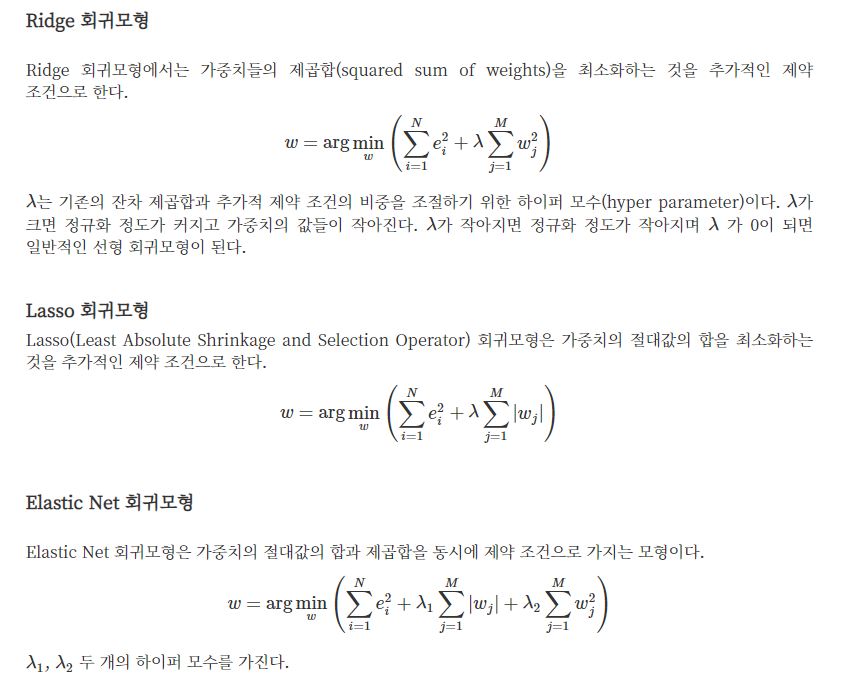

In [78]:
from IPython.display import Image
Image(filename='./ml_files/ridge_lasso_1.png')

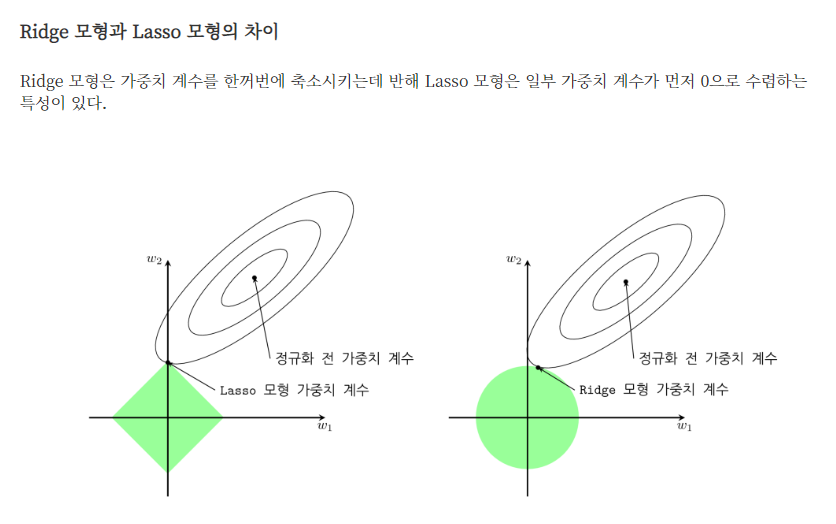

In [79]:
Image(filename='./ml_files/ridge_lasso_2.png')

In [80]:
# Ridge Regression

In [81]:
from sklearn.linear_model import Ridge

In [105]:
# train accuracy: 0.9354965234290372
# test accuracy: 0.7714265753149416

ridge1 = Ridge()
ridge1.fit(x_train, y_train)

print('train accuracy:', ridge1.score(x_train, y_train))
print('test accuracy:', ridge1.score(x_test, y_test))

train accuracy: 0.8636337476233505
test accuracy: 0.7846982211552094


In [109]:
ridge1 = Ridge(alpha=0.01)
ridge1.fit(x_train, y_train)

print('train accuracy:', ridge1.score(x_train, y_train))
print('test accuracy:', ridge1.score(x_test, y_test))

train accuracy: 0.9237492040562213
test accuracy: 0.8744131035834256


In [110]:
# Lasso Regression

In [112]:
from sklearn.linear_model import Lasso

# train accuracy: 0.9354965234290372
# test accuracy: 0.7714265753149416

lasso = Lasso()
lasso.fit(x_train, y_train)

print('train accuracy:', lasso.score(x_train, y_train))
print('test accuracy:', lasso.score(x_test, y_test))

train accuracy: 0.25280585921834187
test accuracy: 0.1054842114924579


In [120]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train, y_train)

print('train accuracy:', lasso.score(x_train, y_train))
print('test accuracy:', lasso.score(x_test, y_test))

train accuracy: 0.9146700747218751
test accuracy: 0.8664397342849736


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805.9231267728236, tolerance: 2.8227220738786283
  positive)


In [121]:
# LogisticRegression

In [162]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [163]:
from sklearn.linear_model import LogisticRegression

lgm = LogisticRegression()
lgm.fit(x_train, y_train)

print('train accuracy:', lgm.score(x_train, y_train))
print('test accuracy:', lgm.score(x_test, y_test))

train accuracy: 0.9483568075117371
test accuracy: 0.9370629370629371


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [149]:
# LogisticRegression 기본적으로 Ridge를 적용.. alpha => C

In [164]:
lgm = LogisticRegression(C=0.1)  # 규제를 강화..
lgm.fit(x_train, y_train)

print('train accuracy:', lgm.score(x_train, y_train))
print('test accuracy:', lgm.score(x_test, y_test))

train accuracy: 0.9553990610328639
test accuracy: 0.916083916083916


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [165]:
lgm = LogisticRegression(C=0.01)  # 규제를 강화..
lgm.fit(x_train, y_train)

print('train accuracy:', lgm.score(x_train, y_train))
print('test accuracy:', lgm.score(x_test, y_test))

train accuracy: 0.9460093896713615
test accuracy: 0.9020979020979021


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [170]:
lgm = LogisticRegression(C=100)
lgm.fit(x_train, y_train)

print('train accuracy:', lgm.score(x_train, y_train))
print('test accuracy:', lgm.score(x_test, y_test))

train accuracy: 0.9460093896713615
test accuracy: 0.9300699300699301


C:\Users\tjoeun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [171]:
### SVM

In [211]:
from sklearn.datasets import load_iris
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [212]:
x_train[:2]

array([[5. , 3.3, 1.4, 0.2],
       [6.9, 3.2, 5.7, 2.3]])

In [213]:
y_train[:4]

array([0, 2, 2, 2])

In [214]:
from sklearn.svm import SVC

In [215]:
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [216]:
print('train accuracy:', svc.score(x_train, y_train))
print('test accuracy:', svc.score(x_test, y_test))

train accuracy: 0.9642857142857143
test accuracy: 1.0


In [223]:
best_score = 0

for g in [0.01, 0.1, 1, 10, 100, 1000, 10000]:
    for c in [0.01, 0.1, 0.5, 1, 2, 4, 8, 20, 100]:
        svc = SVC(C=c, gamma=g)
        svc.fit(x_train, y_train)
        ts_score = svc.score(x_test, y_test)
#         print(ts_score)
        if ts_score > best_score:
            best_score = ts_score
            best_par = (c, g)

print(best_score)
print(best_par)            

1.0
(20, 0.01)


In [227]:
svc = SVC(C=20, gamma=0.01)
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

1.0

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
params = {'C':[0.01, 0.1, 0.5, 1, 2, 4, 8, 20, 100],
         'gamma':[0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid = GridSearchCV(svc, params, refit=True, verbose=True)

In [231]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=20, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 2, 4, 8, 20, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [232]:
grid.best_score_

0.9648221343873518

In [233]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [234]:
grid.score(x_test, y_test)

0.9736842105263158

In [235]:
### DecisionTree

In [254]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [255]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1)

In [256]:
tree.fit(x_train, y_train)

print('train accuracy:', tree.score(x_train, y_train))
print('test accuracy:', tree.score(x_test, y_test))

train accuracy: 1.0
test accuracy: 0.9370629370629371


In [257]:
tree = DecisionTreeClassifier(max_depth=5, random_state=1)

tree.fit(x_train, y_train)

print('train accuracy:', tree.score(x_train, y_train))
print('test accuracy:', tree.score(x_test, y_test))

train accuracy: 0.9953051643192489
test accuracy: 0.9440559440559441


In [323]:
from sklearn.ensemble import RandomForestClassifier

In [324]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [325]:
rfc = RandomForestClassifier(random_state=1, n_estimators = 5)

rfc.fit(x_train, y_train)

print('train accuracy:', rfc.score(x_train, y_train))
print('test accuracy:', rfc.score(x_test, y_test))

train accuracy: 0.9953051643192489
test accuracy: 0.9440559440559441


In [326]:
rfc = RandomForestClassifier(max_depth = 4, random_state=1, n_estimators = 5)

rfc.fit(x_train, y_train)

print('train accuracy:', rfc.score(x_train, y_train))
print('test accuracy:', rfc.score(x_test, y_test))

train accuracy: 0.9906103286384976
test accuracy: 0.951048951048951
